<a href="https://colab.research.google.com/github/nodonut6311/RSMM-Remote-Soil-Moisture-Monitoring/blob/main/test_plot(R1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
uploaded = files.upload()

Saving R1(13-24)_WET.csv to R1(13-24)_WET.csv


In [3]:
uploaded = files.upload()

Saving R1(13-24)_DRY.csv to R1(13-24)_DRY.csv


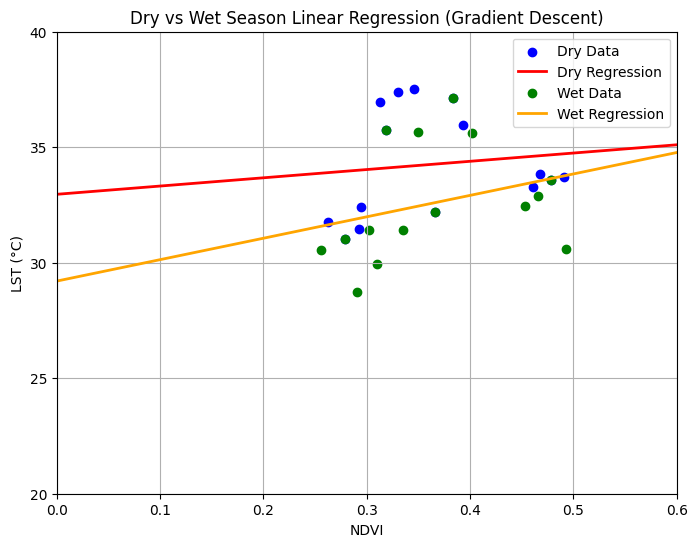

Dry Season Regression: LST = 3.5721 * NDVI + 32.9620
Wet Season Regression: LST = 9.2766 * NDVI + 29.2051


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gradient_descent_regression(filename, color_points, color_line, label_points, label_line):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.strip()

    x = df["NDVI"].values
    y = df["LST (°C)"].values

    x_mean, x_std = np.mean(x), np.std(x)
    x_norm = (x - x_mean) / x_std

    m, b = 0.0, 0.0
    alpha, epochs = 0.01, 1000
    n = len(x_norm)

    for epoch in range(epochs):
        y_pred = m * x_norm + b
        error = y_pred - y
        dm = (2/n) * np.dot(error, x_norm)
        db = (2/n) * np.sum(error)
        m -= alpha * dm
        b -= alpha * db

    x_line = np.linspace(0, 0.6, 100)
    x_line_norm = (x_line - x_mean) / x_std
    y_line = m * x_line_norm + b

    plt.scatter(x, y, color=color_points, label=label_points)
    plt.plot(x_line, y_line, color=color_line, linewidth=2, label=label_line)

    slope_original = m / x_std
    intercept_original = b - (m * x_mean / x_std)
    return slope_original, intercept_original

plt.figure(figsize=(8,6))

slope_dry, intercept_dry = gradient_descent_regression(
    "R1(13-24)_DRY.csv",
    color_points="blue", color_line="red",
    label_points="Dry Data", label_line="Dry Regression"
)

slope_wet, intercept_wet = gradient_descent_regression(
    "R1(13-24)_WET.csv",
    color_points="green", color_line="orange",
    label_points="Wet Data", label_line="Wet Regression"
)

plt.xlabel("NDVI")
plt.ylabel("LST (°C)")
plt.title("Dry vs Wet Season Linear Regression (Gradient Descent)")
plt.legend()
plt.grid(True)

plt.xlim(0, 0.6)
plt.ylim(20, 40)
plt.xticks(np.arange(0, 0.61, 0.1))
plt.yticks(np.arange(20, 41, 5))

plt.show()

print(f"Dry Season Regression: LST = {slope_dry:.4f} * NDVI + {intercept_dry:.4f}")
print(f"Wet Season Regression: LST = {slope_wet:.4f} * NDVI + {intercept_wet:.4f}")
